### 装饰器--decorator
- 解决的问题：动态增加函数的功能，但不改变原有的代码。
- 本质上，decorator就是一个返回函数的高阶函数
- 前提条件：
    - 高阶函数可以接受函数作为参数
    - 高阶函数函数可以返回函数
    - 上两步加和，接受一个函数作为参数，对其进行包装，返回一个函数。

In [12]:
"""
简单的装饰器
"""
def func1():
    print("sunck is a good man")
def outer(func):
    def inner():
        print("*******************")
        func()
    return inner() #此处函数已经执行 
#f 是函数func的加强版本
f = outer(func1)  # 由于return返回值为inner（），函数已经执行，所以，传入函数参数时直接返回操作结果

*******************
sunck is a good man


In [14]:
"""
深入了解装饰器
"""
def say(age):
    print("sunck is %d" %(age))
    
say(11)


def outer(func):
    def inner(age):
        if age < 0:
            age = 0
        func(age)
    return inner  # 函数此处没有执行，而是返回函数名
say = outer(say)  # 由于return返回值为inner，函数没有执行，而是返回指向函数的变量，所以，传入函数参数时返回的是新的函数
say(-10)          # 新函数真正执行


sunck is 11
sunck is 0


In [35]:
"""
@ 符号的应用
"""
def outer(func):
    def inner(age):
        if age < 0:
            age = 0
        func(age)
    return inner
say = outer(say)
say(-10)

@outer   #使用@符号将装饰器引用到哈结束 =say = outer(say)
def say(age):
    print("sunck is %d" %(age))
    
say(-10)

sunck is 0
sunck is 0


In [ ]:
"""
通用装饰器
"""
#装饰器
def outer(func):
    def inner(*args,**kwargs):  #不定长参数
        #添加修饰的功能
        func(*args,**kwargs)
    return inner
func = outer(func)  # 返回的新函数赋值给旧函数变量名本身，这样进行函数的赋值可以彻底隐藏原函数
func(x)

#使用@符号将装饰器引用到函数上，@outer 相当于 func = outer(func)
@outer   
def func(age):
    print("sunck is %d" %(age))
    
func(x)

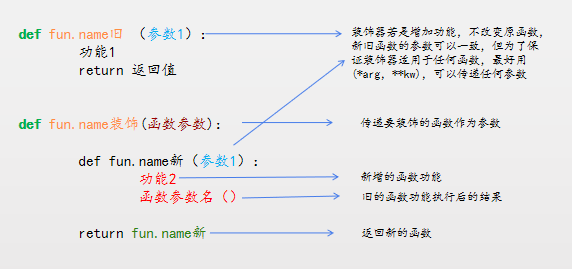

### 装饰器参数问题
- 要让 @log 自适应任何参数定义的函数，可以利用Python的 \*args 和 \**kw，保证任意个数的参数总是能正常调用：

In [20]:
# 阶乘函数装饰
from functools import reduce
def log(f):
    def fn(x):
        print ('call ' + f.__name__ + '()...')
        return f(x)
    return fn
@log
def factorial(n):
    return reduce(lambda x,y: x*y, range(1, n+1))
print (factorial(10))

"""
@log
def add(x, y):
    return x + y
print (add(1, 2))
报错：fn() takes 1 positional argument but 2 were given
"""

call factorial()...
3628800


'\n@log\ndef add(x, y):\n    return x + y\nprint (add(1, 2))\n报错：fn() takes 1 positional argument but 2 were given\n'

In [25]:
# 阶乘函数装饰参数变化
from functools import reduce
def log(f):
    
          ############
    def fn(*args,**kw):
          ############
            
        print ('call ' + f.__name__ + '()...')
                ############
        return f(*args,**kw)
                ############
    return fn
@log
def factorial(n):
    return reduce(lambda x,y: x*y, range(1, n+1))
print (factorial(10))

@log
def add(x, y):
    return x + y
print (add(1, 2))


call factorial()...
3628800
call add()...
3


- 带参数装饰器
- 对于上面的被装饰的函数，log打印的语句是不能变的（除了函数名），但有时需要传递参数，使打印的内容有所变化，所以要给装饰器传递参数。

In [ ]:
"""
带参数的log函数首先返回一个decorator函数，再让这个decorator函数接收my_func并返回新函数
"""
@log('DEBUG')
def my_func():
    pass
#上面的语句相当于
my_func = log('DEBUG')(my_func)
# 再展开就是
log_decorator = log('DEBUG')
my_func = log_decorator(my_func)
#上面的语句有相当于
log_decorator = log('DEBUG')
@log_decorator
def my_func():
    pass

In [2]:
def log(prefix):
    def log_decorator(f):
        def wrapper(*args, **kw):
            print ('[%s] %s()...' % (prefix, f.__name__))
            return f(*args, **kw)
        return wrapper
    return log_decorator

@log('DEBUG')
def test():
    pass
print (test())

[DEBUG] test()...
None


In [4]:
#对于这种3层嵌套的decorator定义，你可以先把它拆开：
# 标准decorator:
def log_decorator(f):
    def wrapper(*args, **kw):
        print ('[%s] %s()...' % (prefix, f.__name__))
        return f(*args, **kw)
    return wrapper
return log_decorator

# 返回decorator:
def log(prefix):
    return log_decorator(f)
#拆开以后会发现，调用会失败，因为在3层嵌套的decorator定义中，最内层的wrapper引用了最外层的参数prefix，
#所以，把一个闭包拆成普通的函数调用会比较困难。不支持闭包的编程语言要实现同样的功能就需要更多的代码。

SyntaxError: 'return' outside function (<ipython-input-4-d3aa830e2d74>, line 8)

In [11]:
"""
装饰阶乘函数，计算运行时间，传递时间单位。
"""
from functools import reduce
import time
def performance(unit):
    def perf_decorator(f):
        def wrapper(*args, **kw):
            t1 = time.time()
            r = f(*args, **kw)
            t2 = time.time()
            t = (t2 - t1) * 1000 if unit=='ms' else (t2 - t1)
            print ('call %s() in %f %s' % (f.__name__, t, unit))
            return r
        return wrapper
    return perf_decorator

@performance('ms')
def factorial(n):
    return reduce(lambda x,y: x*y, range(1, n+1))
print (factorial(10))

call factorial() in 0.000000 ms
3628800


### 装饰前后函数的变化

#### 函数属性--函数名
- \_\_name\_\_可以查看函数的原始函数名
- 由于decorator返回的新函数函数名已经不是原函数，而是@log内部定义的'wrapper'，这对于那些依赖函数名的代码就会失效。

In [14]:
# 装饰前
def f1(x):
    pass
print (f1.__name__)
#装饰后
def log(f):
    def wrapper(*args, **kw):
        print ('call...')
        return f(*args, **kw)
    return wrapper
@log
def f2(x):
    pass
print (f2.__name__)

f1
wrapper


#### 函数属性--其他

In [20]:
#decorator还改变了函数的__doc__等其它属性。如果要让调用者看不出一个函数经过了@decorator的“改造”，就需要把原函数的一些属性复制到新函数中
def log(f):
    def wrapper(*args,**kw):
        print ('call...')
        return f(*args, **kw)
    wrapper.__name__ = f.__name__
    wrapper.__doc__ = f.__doc__
    return wrapper

In [18]:
#这样写decorator很不方便，因为很难把原函数的所有必要属性都一个个复制到新函数上，所以Python内置的functools可以用来自动化完成这个任务：
import functools
def log(f):
    @functools.wraps(f)
    def wrapper(*args, **kw):
        print ('call...')
        return f(*args, **kw)
    return wrapper

In [19]:
#由于我们把原函数签名改成(*args, **kw)，因此，无法获得原函数的原始参数信息。
#即便我们采用固定参数来装饰只有一个参数的函数：也可能改变原函数的参数名，因为新函数的参数名始终是 'x'，原函数定义的参数名不一定叫 'x'。
def log(f):
    @functools.wraps(f)#@functools.wraps应该作用在返回的新函数上。
    def wrapper(x):
        print ('call...')
        return f(x)
    return wrapper